#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysism
- Data Pre-Processing
- Model Training
- Choose best model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv("data/stud.csv")
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# summary of df students.csv
the dataset is about student performance with features such as gender, race, parent_education, lunch, and scores such as math_score, reading and writing score.

## Problem statement
the problem statement of the dataset is how the features of a student have thier effect in the output/dependent feature = total score



## datachecks

In [4]:
# missing values

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
#duplicates

df.duplicated().sum()

0

In [6]:
#datatype check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# uniqueness of columns in the dataset 
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
# statistics of df
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## exploratory analysis

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
print("race ethnicity unique features")
print(len(df["race_ethnicity"].unique()),df["race_ethnicity"].unique())

print("-----------------------------------")
print("parent level unique features")
print(len(df["parental_level_of_education"].unique()),df["parental_level_of_education"].unique())

print("-----------------------------------")
print("lunch unique features")
print(len(df["lunch"].unique()),df["lunch"].unique())

print("-----------------------------------")
print("test preperation unique features")
print(len(df["test_preparation_course"].unique()),df["test_preparation_course"].unique())

print("-----------------------------------")

race ethnicity unique features
5 ['group B' 'group C' 'group A' 'group D' 'group E']
-----------------------------------
parent level unique features
6 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
-----------------------------------
lunch unique features
2 ['standard' 'free/reduced']
-----------------------------------
test preperation unique features
2 ['none' 'completed']
-----------------------------------


In [11]:
numerical_features = [feat for feat in df.columns if df[feat].dtype!="O"] 
categorical_features = [feat for feat in df.columns if df[feat].dtype=="O"] 

numerical_features, categorical_features

(['math_score', 'reading_score', 'writing_score'],
 ['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'])

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
# features merge and reduction
df["total_scores"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average"] =df["total_scores"] / 3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_scores,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='average', ylabel='Count'>

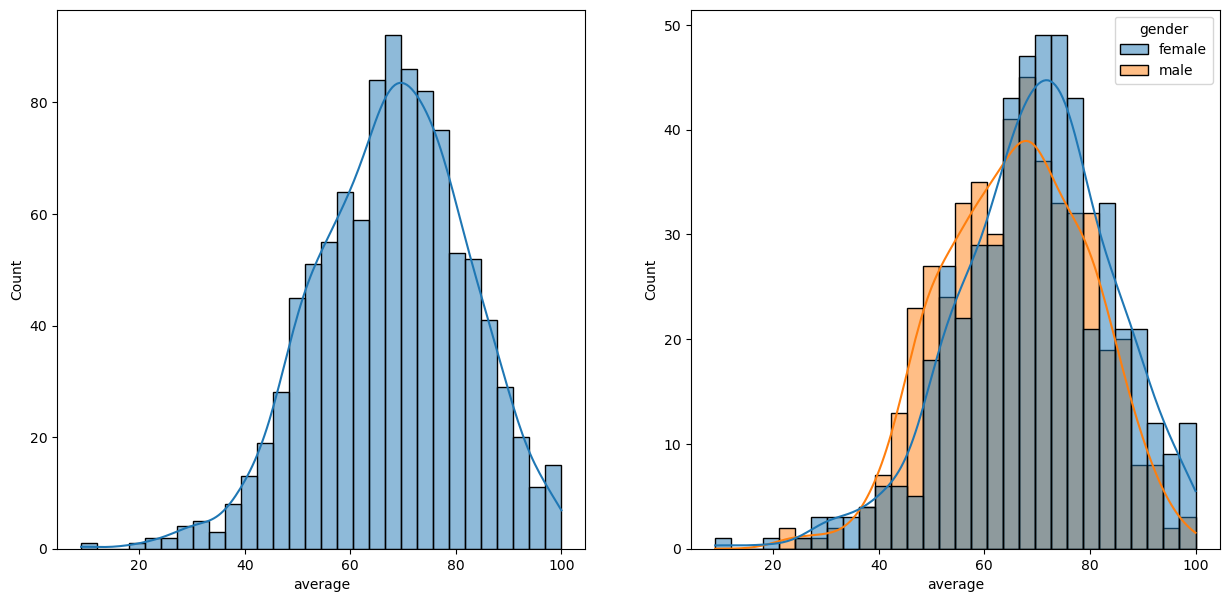

In [14]:
fig, axs =plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)

sns.histplot(data=df, x="average", bins=30, kde=True)
plt.subplot(122)
sns.histplot(data=df, x="average", bins=30, kde=True, hue="gender")



C:\Users\Gobinath\AppData\Local\Temp\ipykernel_8416\384664758.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\Gobinath\AppData\Local\Temp\ipykernel_8416\384664758.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\Gobinath\AppData\Local\Temp\ipykernel_8416\384664758.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<Axes: xlabel='average', ylabel='Count'>

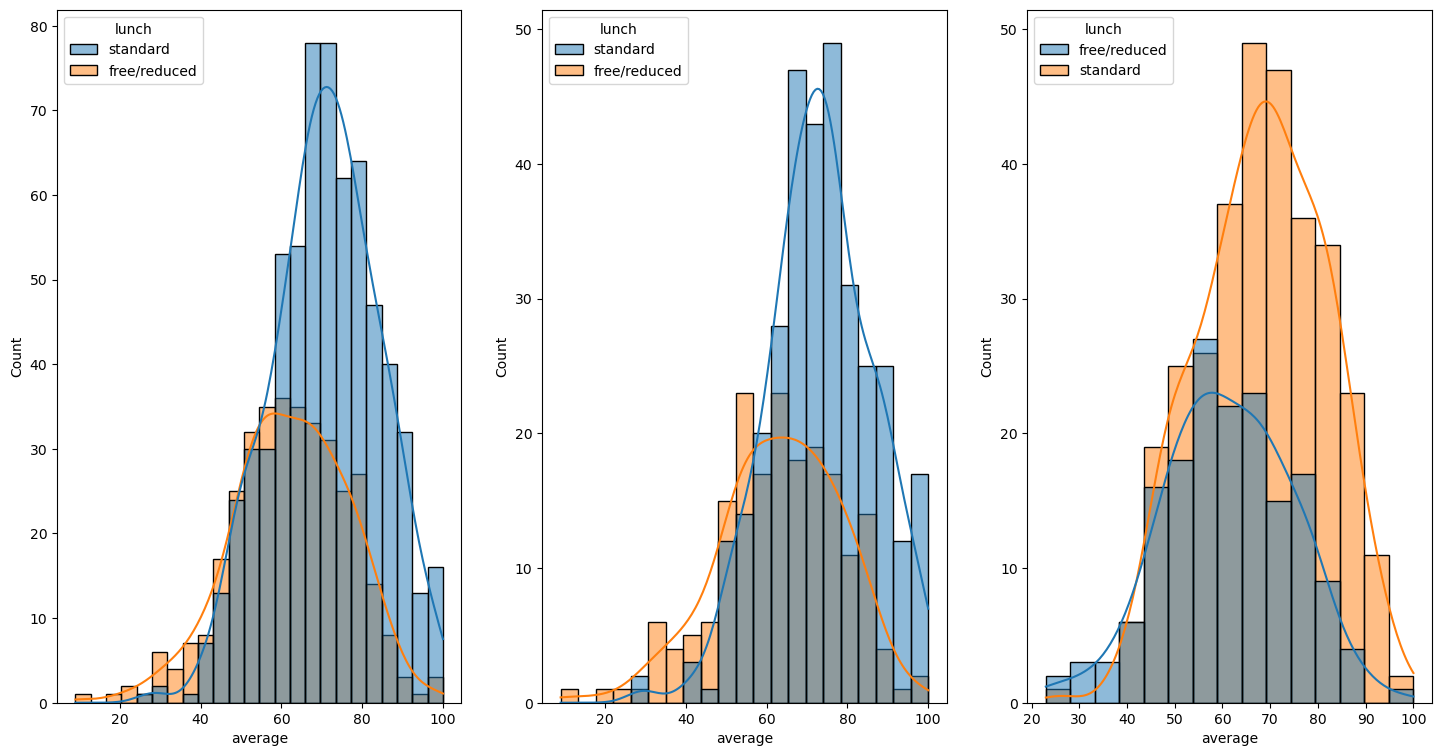

In [15]:
fig, ax = plt.subplots(1,3, figsize=(24,9))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')



C:\Users\Gobinath\AppData\Local\Temp\ipykernel_8416\446313254.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\Gobinath\AppData\Local\Temp\ipykernel_8416\446313254.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\Gobinath\AppData\Local\Temp\ipykernel_8416\446313254.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<Axes: xlabel='average', ylabel='Count'>

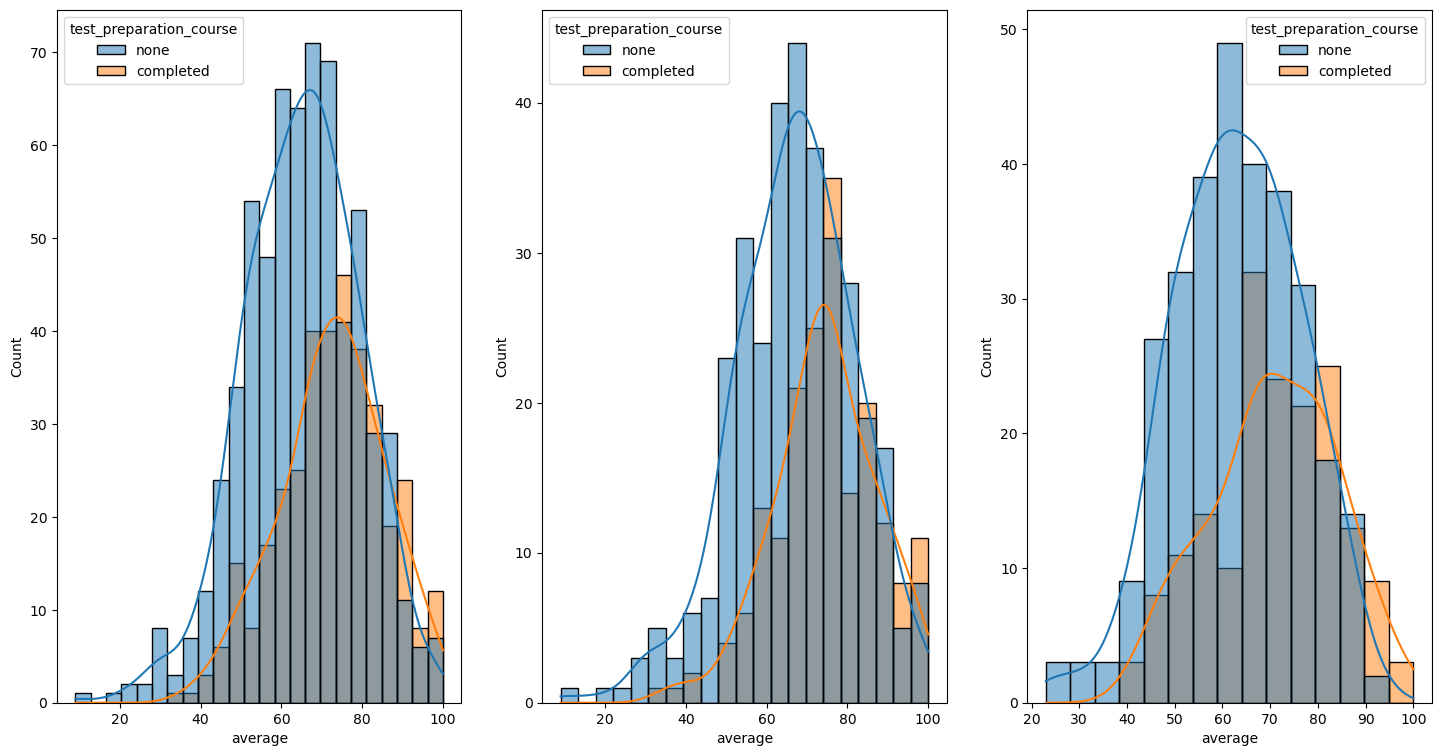

In [16]:
fig, ax = plt.subplots(1,3, figsize=(24,9))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='test_preparation_course')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='test_preparation_course')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='test_preparation_course')



C:\Users\Gobinath\AppData\Local\Temp\ipykernel_8416\3159351297.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\Gobinath\AppData\Local\Temp\ipykernel_8416\3159351297.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\Gobinath\AppData\Local\Temp\ipykernel_8416\3159351297.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<Axes: xlabel='average', ylabel='Count'>

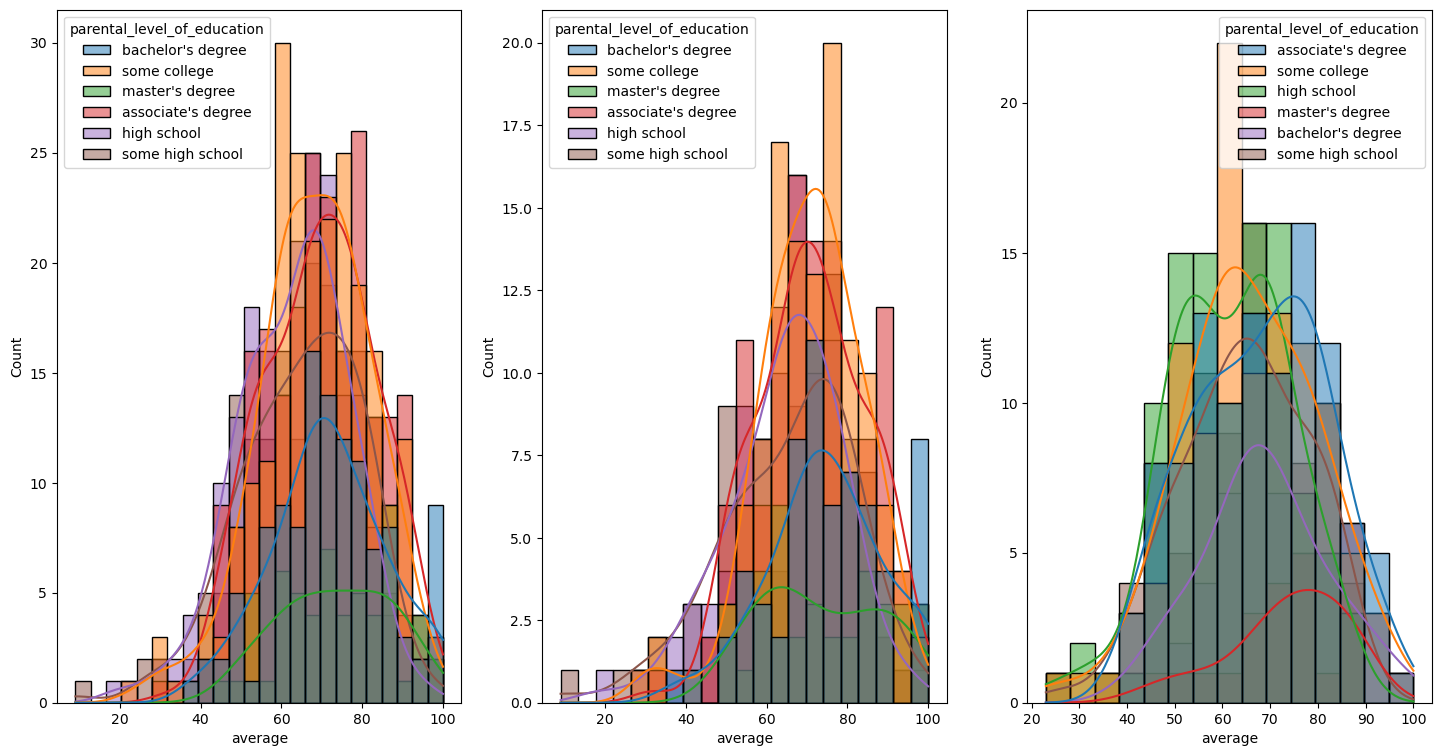

In [17]:
fig, ax = plt.subplots(1,3, figsize=(24,9))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education')



In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_scores,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


C:\Users\Gobinath\AppData\Local\Temp\ipykernel_8416\518438128.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\Gobinath\AppData\Local\Temp\ipykernel_8416\518438128.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\Gobinath\AppData\Local\Temp\ipykernel_8416\518438128.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<Axes: ylabel='writing_score'>

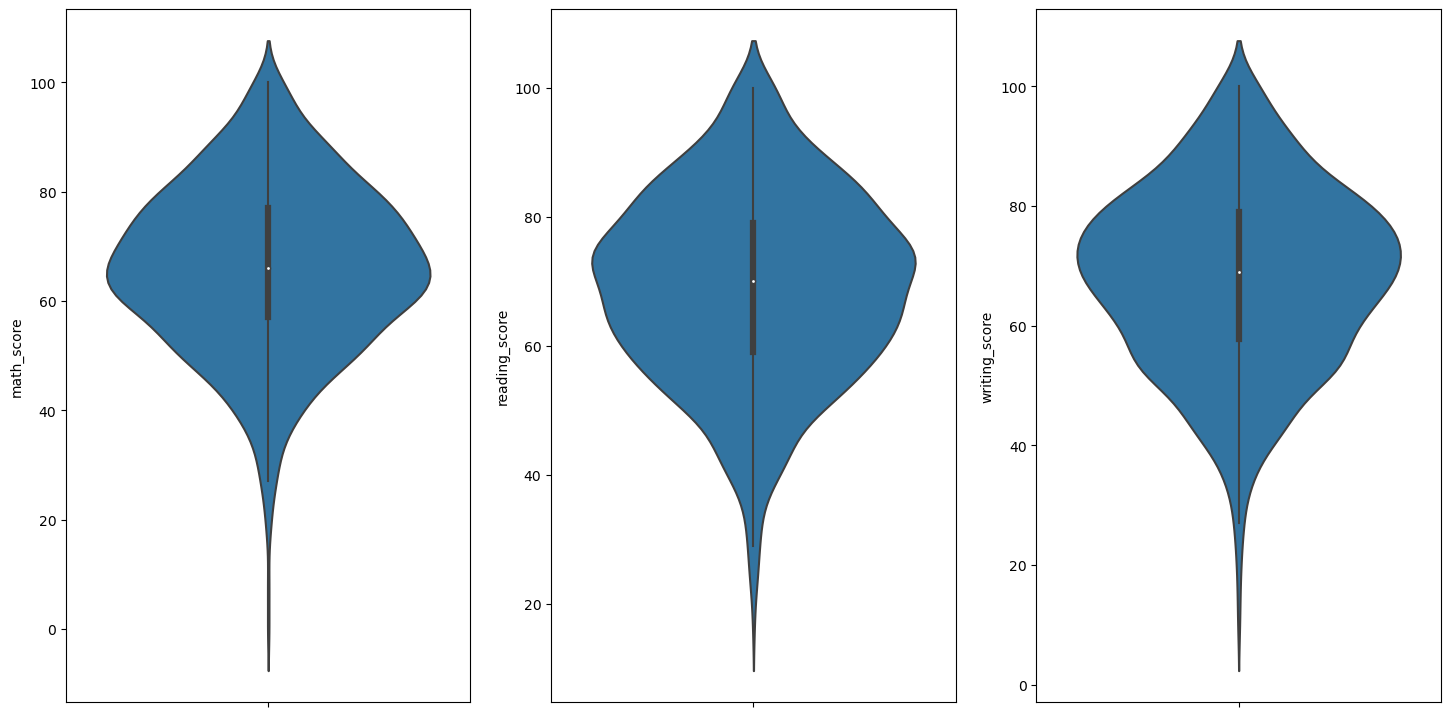

In [19]:
fig,ax = plt.subplots(1,3,figsize=(24,9))
plt.subplot(141)
sns.violinplot(data=df,y='math_score')
plt.subplot(142)
sns.violinplot(data=df,y='reading_score')
plt.subplot(143)
sns.violinplot(data=df,y='writing_score')

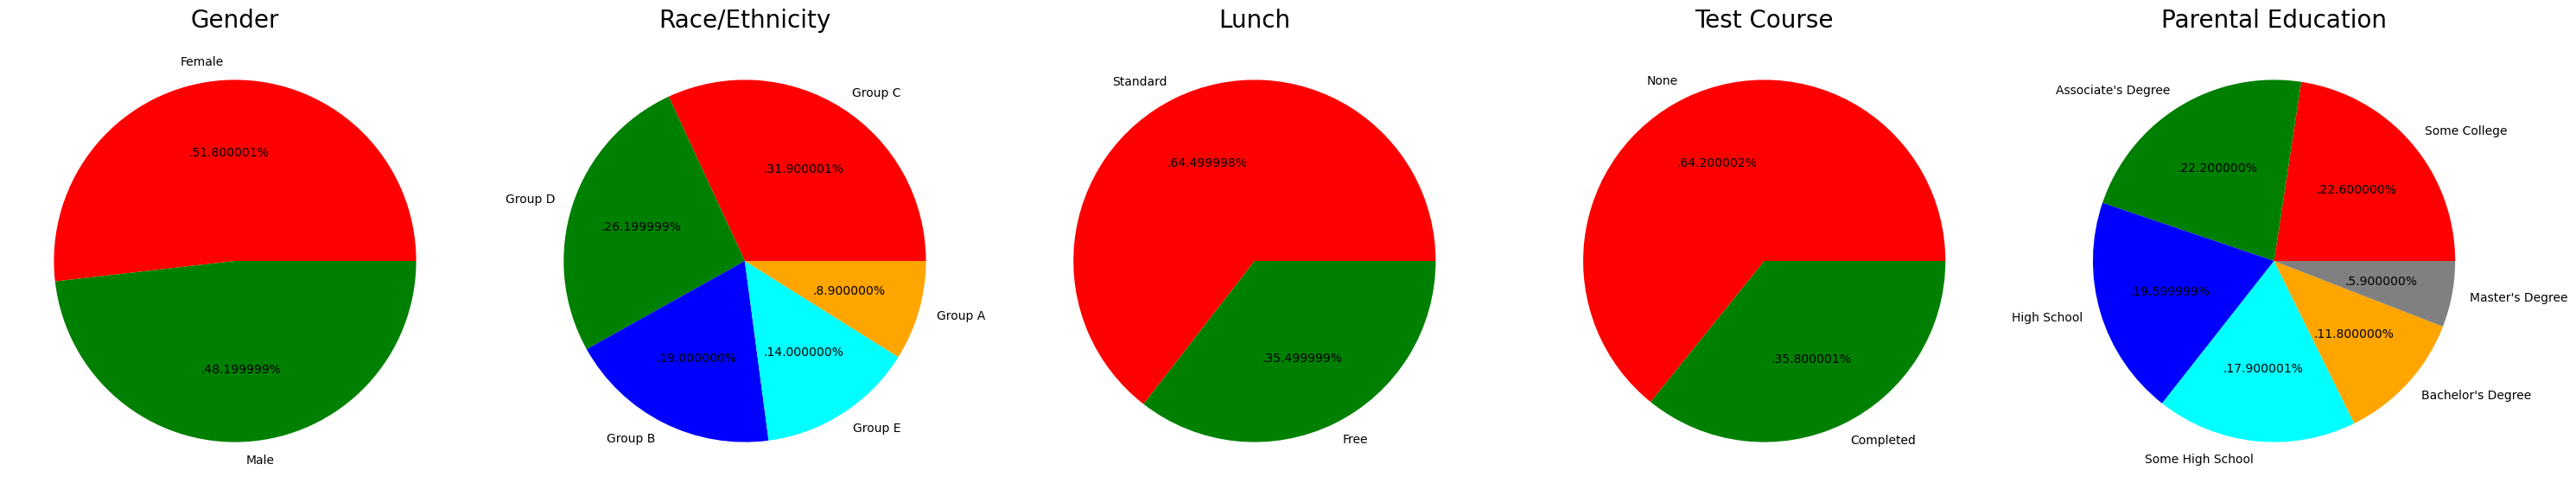

In [20]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_scores,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


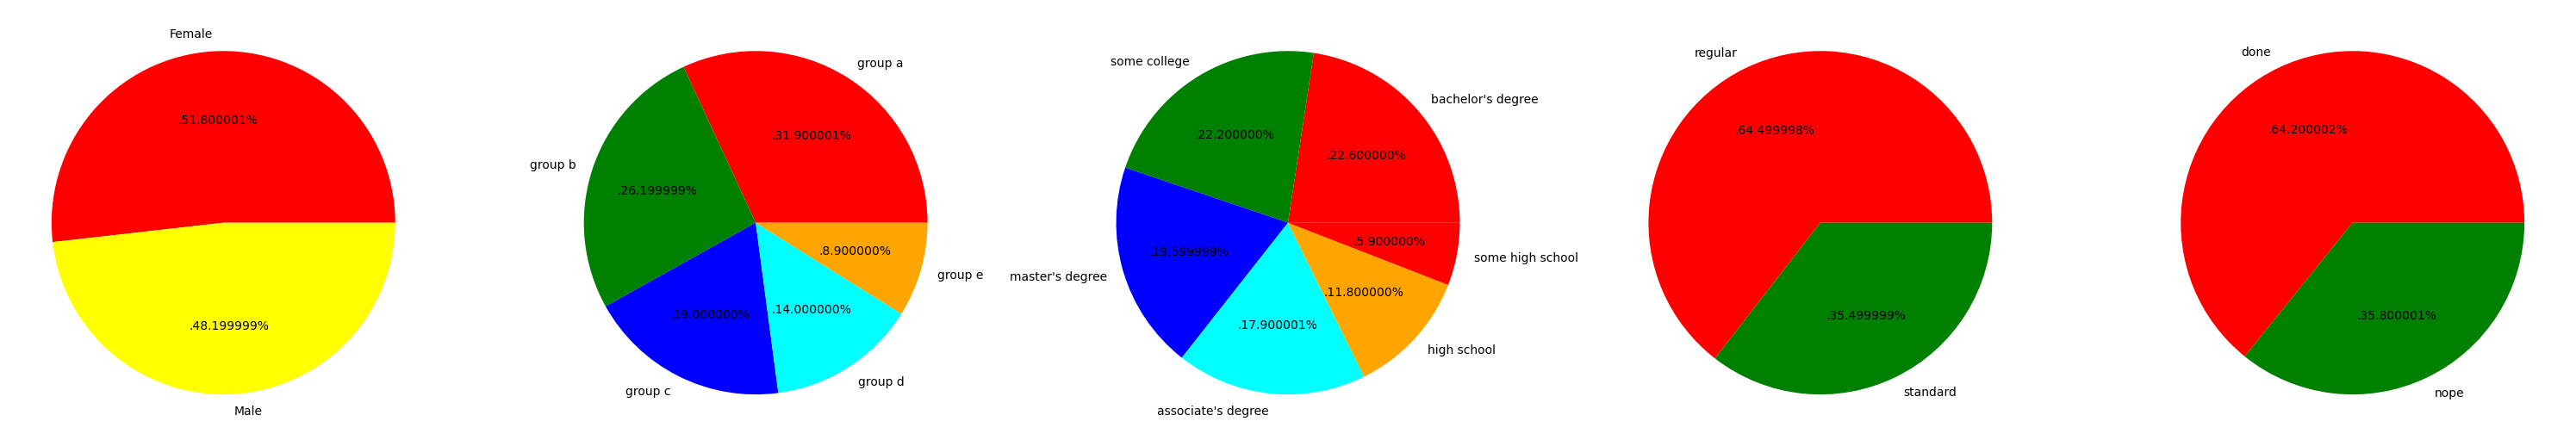

In [22]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df["gender"].value_counts()
labels = 'Female', "Male"
color=["red","yellow"]
plt.pie(size, colors=color, labels=labels,  autopct=".%2f%%")

plt.subplot(1,5,2)
size = df["race_ethnicity"].value_counts()
labels = "group a", "group b", "group c", "group d", "group e"
color=['red', 'green', 'blue', "cyan", 'orange']
plt.pie(size, colors=color, labels=labels,  autopct=".%2f%%")

plt.subplot(1,5,3)
size = df["parental_level_of_education"].value_counts()
labels ="bachelor's degree", 'some college', "master's degree", "associate's degree",'high school', 'some high school'
color=['red', 'green', 'blue', "cyan", 'orange']
plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")

plt.subplot(1,5,4)
size = df["lunch"].value_counts()
labels = "regular","standard"
color=['red', 'green', 'blue', "cyan", 'orange']
plt.pie(size, colors=color, labels=labels,  autopct=".%2f%%")

plt.subplot(1,5,5)
size = df["test_preparation_course"].value_counts()
labels = "done","nope"
color=['red', 'green', 'blue']
plt.pie(size, colors=color, labels=labels,  autopct=".%2f%%")

plt.tight_layout()
plt.grid()

plt.show()




### gender univariate and multivariate analysis

([<matplotlib.patches.Wedge at 0x27934952010>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'male'),
  Text(0.06782226650507357, -1.1980818587083752, 'female')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.80%'),
  Text(0.03956298879462625, -0.698881084246552, '48.20%')])

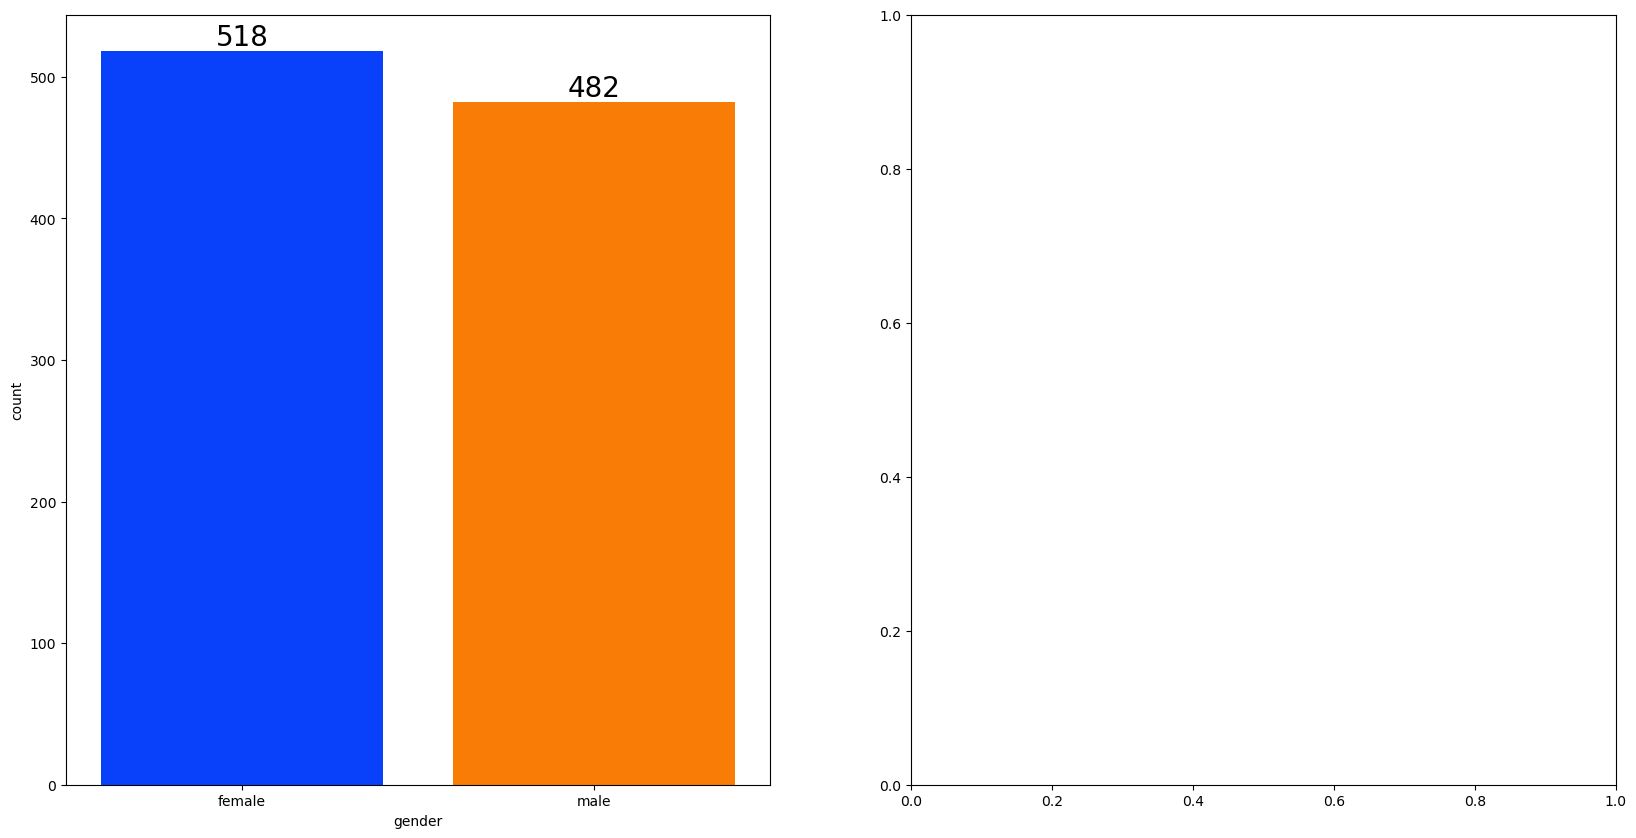

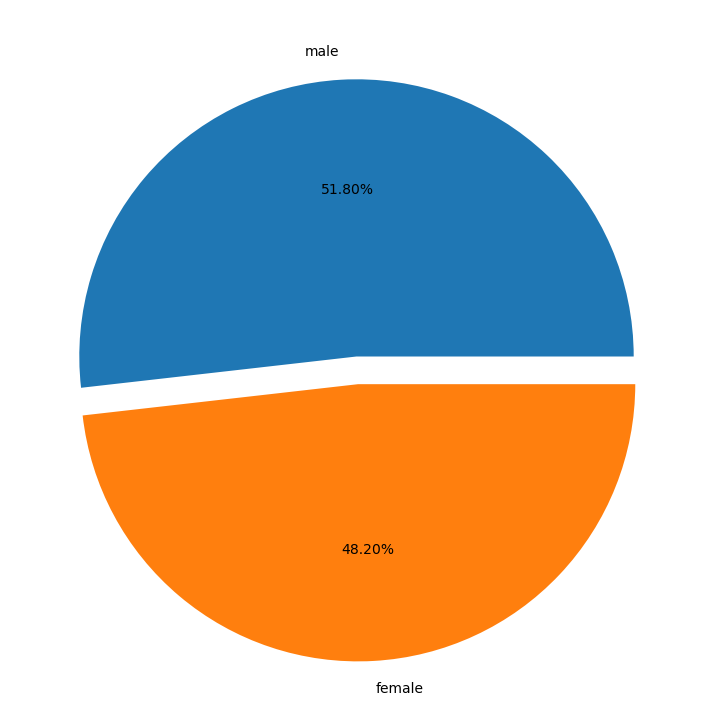

In [23]:
#univaraite analyis
f, ax=plt.subplots(1,2,figsize=(20,10))
plt.figure(figsize=(14,9))
sns.countplot(x=df["gender"],data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
plt.pie(x=df["gender"].value_counts(), labels=["male", "female"], explode=[0,0.1], autopct='%2.2f%%')

Text(0.5, 1.0, 'writingscore ')

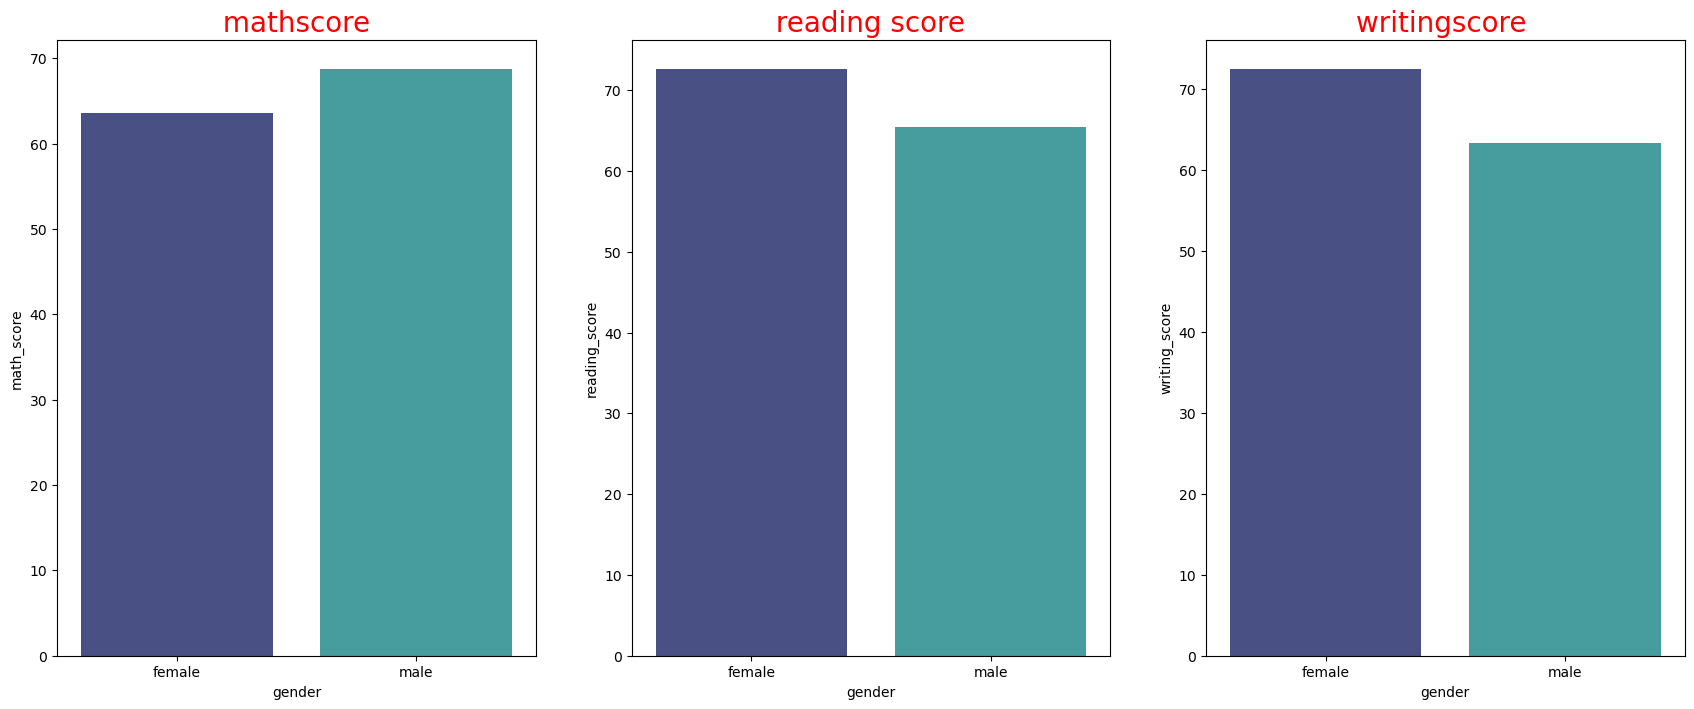

In [24]:
group_data1 = df.groupby('gender')

f, ax = plt.subplots(1,3,figsize=(21, 8))

sns.barplot(x=group_data1["math_score"].mean().index, y=group_data1["math_score"].mean(),palette='mako', ax=ax[0])
ax[0].set_title(" mathscore " ,color='red', size=20)

sns.barplot(x=group_data1["reading_score"].mean().index, y=group_data1["reading_score" ].mean(),palette='mako', ax=ax[1])
ax[1].set_title(" reading score ", color='red', size=20)

sns.barplot(x=group_data1["writing_score"].mean().index, y=group_data1["writing_score"].mean(),palette='mako', ax=ax[2])
ax[2].set_title("writingscore ", color='red', size=20)

In [25]:
print("race ethnicity unique features")
print(len(df["race_ethnicity"].unique()),df["race_ethnicity"].unique())

print("-----------------------------------")
print("parent level unique features")
print(len(df["parental_level_of_education"].unique()),df["parental_level_of_education"].unique())

print("-----------------------------------")
print("lunch unique features")
print(len(df["lunch"].unique()),df["lunch"].unique())

print("-----------------------------------")
print("test preperation unique features")
print(len(df["test_preparation_course"].unique()),df["test_preparation_course"].unique())

print("-----------------------------------")

race ethnicity unique features
5 ['group B' 'group C' 'group A' 'group D' 'group E']
-----------------------------------
parent level unique features
6 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
-----------------------------------
lunch unique features
2 ['standard' 'free/reduced']
-----------------------------------
test preperation unique features
2 ['none' 'completed']
-----------------------------------


### parental_level_of_education univaraite, bivaraite, multivariate anlysis

([<matplotlib.patches.Wedge at 0x27934d7dc50>,
 [Text(0.8341981156790161, 0.717017087521336, "bachelor's degree"),
  Text(-0.5717990621018805, 0.939705183863221, 'some college'),
  Text(-1.0543739750814827, -0.3135211646298753, "master's degree"),
  Text(-0.11383566476996158, -1.0940938905900084, "associate's degree"),
  Text(0.8112644257554884, -0.7428660925790178, 'high school'),
  Text(1.0811581857178525, -0.20272389463327067, 'some high school')],
 [Text(0.45501715400673604, 0.3911002295570923, '22.60%'),
  Text(-0.31189039751011655, 0.5125664639253932, '22.20%'),
  Text(-0.5751130773171723, -0.1710115443435683, '19.60%'),
  Text(-0.062092180783615405, -0.5967784857763682, '17.90%'),
  Text(0.44250786859390273, -0.4051996868612824, '11.80%'),
  Text(0.5897226467551923, -0.1105766697999658, '5.90%')])

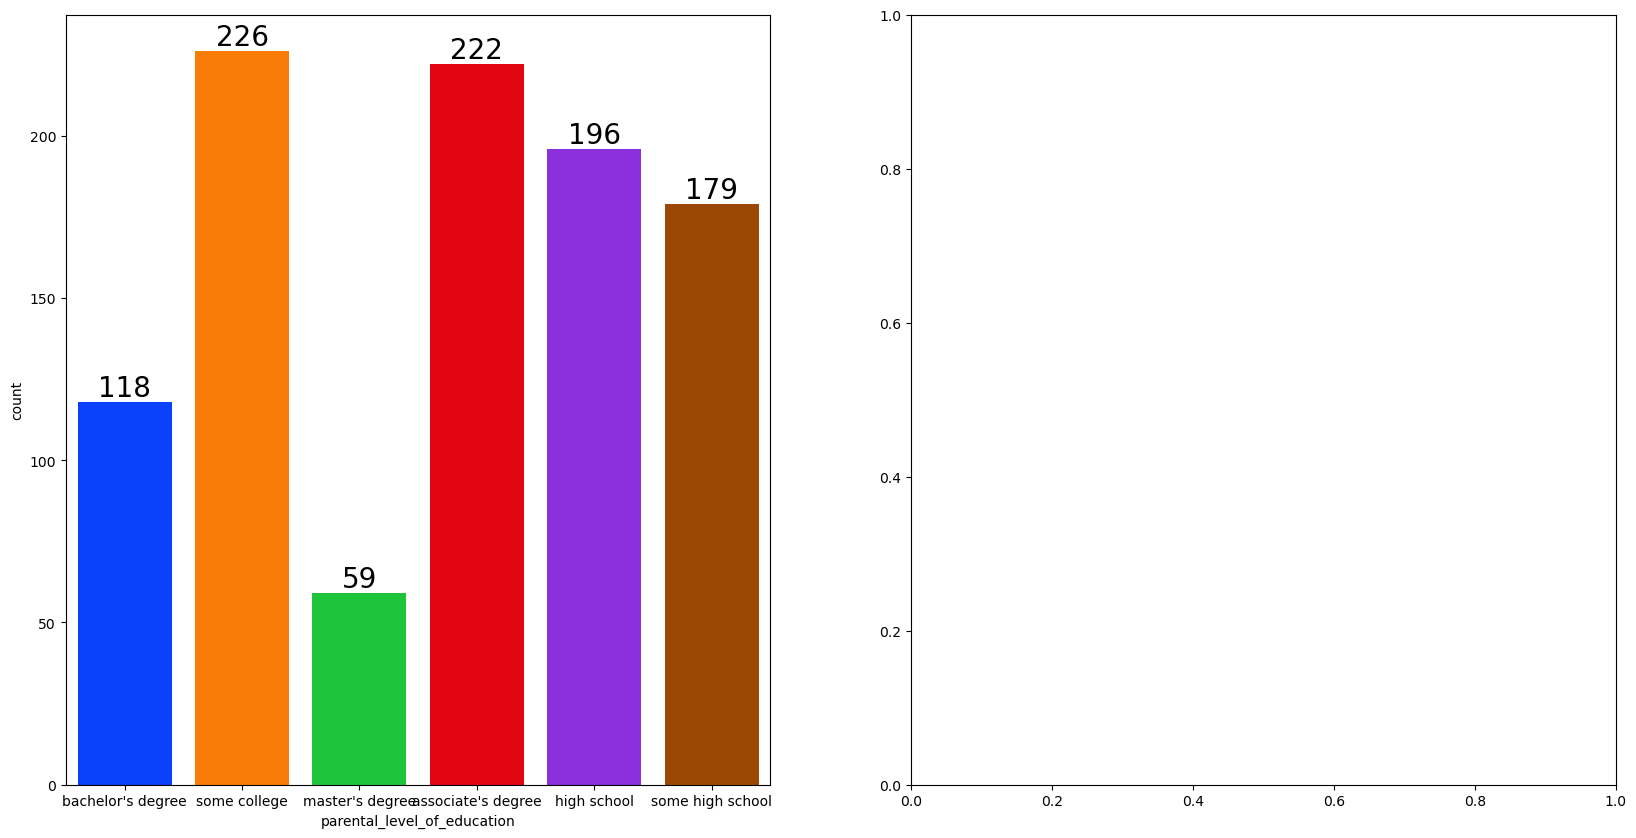

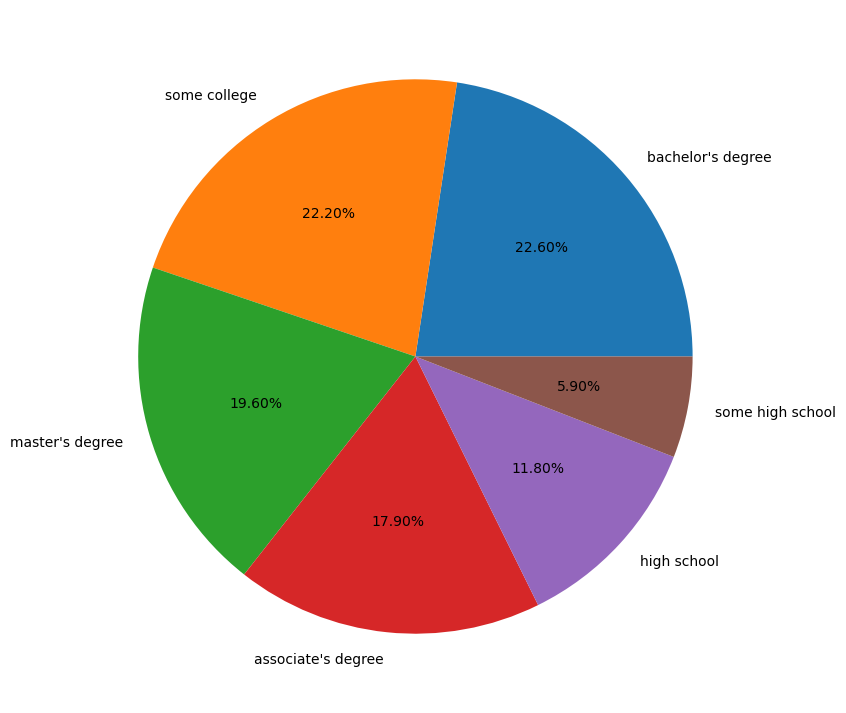

In [ ]:
#univaraite analyis 
f, ax=plt.subplots(1,2,figsize=(20,10))
plt.figure(figsize=(14,9))
sns.countplot(x=df["parental_level_of_education"],data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='b6lack', size=20)
plt.pie(x=df["parental_level_of_education"].value_counts(), labels=["bachelor's degree", 'some college', "master's degree" ,"associate's degree",
 'high school' ,'some high school'], autopct='%2.2f%%')

Text(0.5, 1.0, 'writing score')

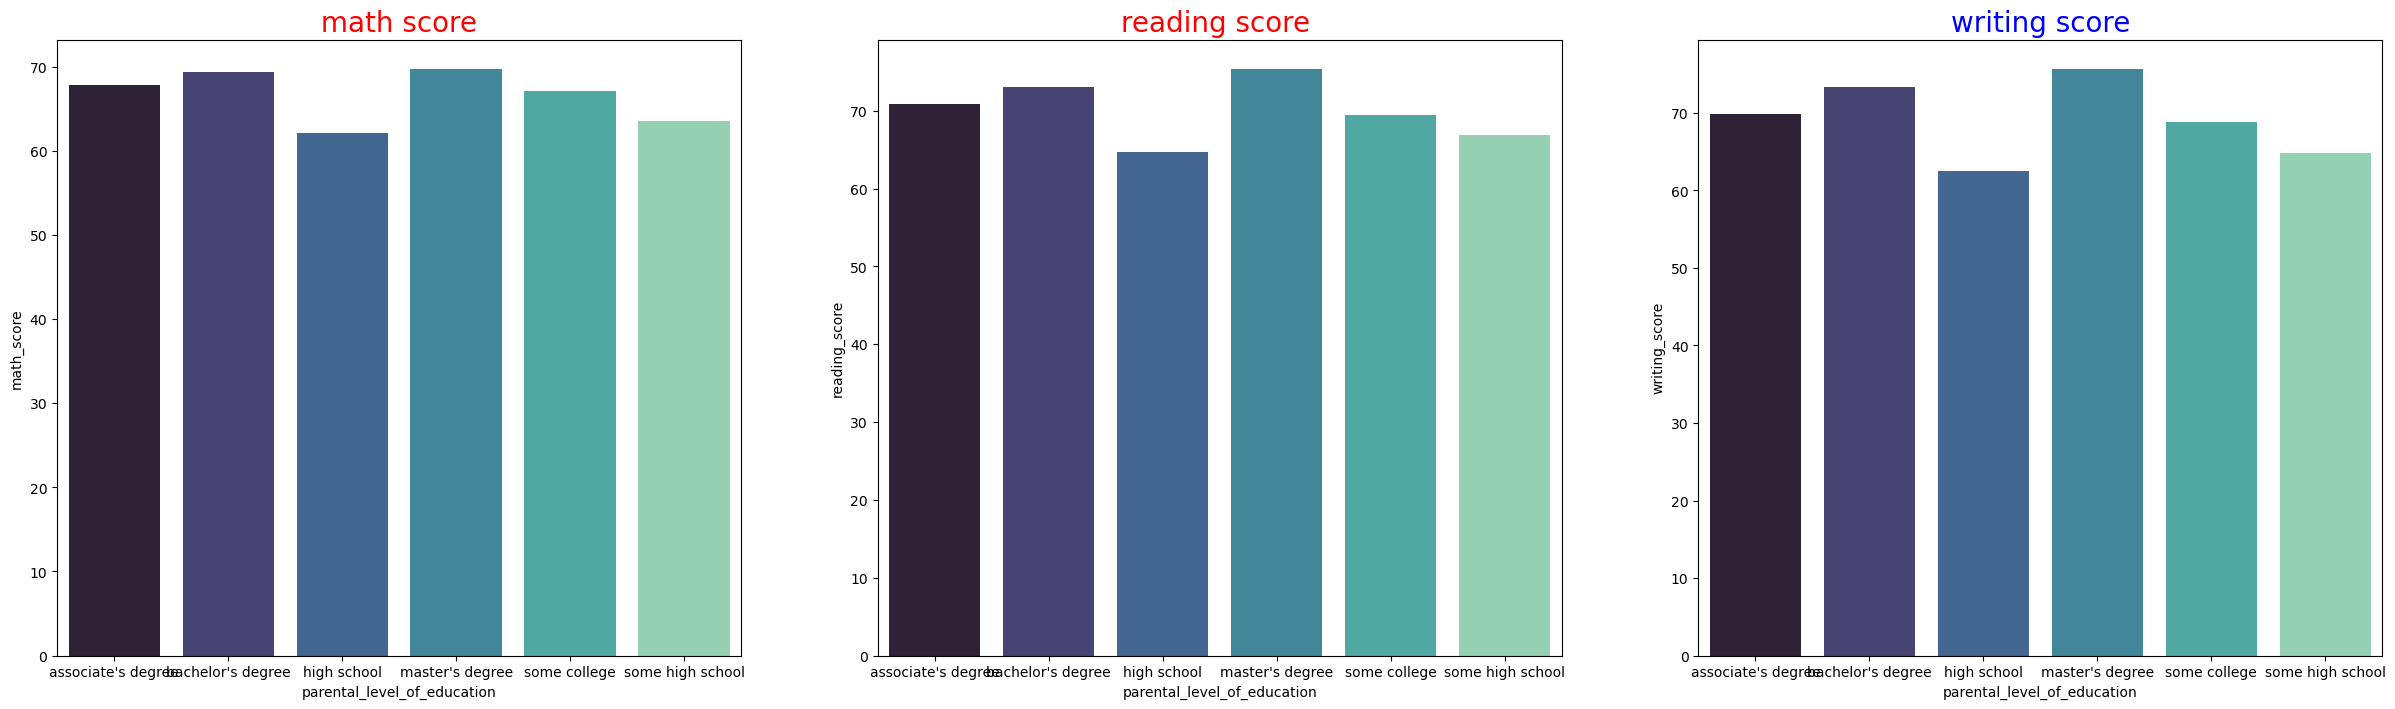

In [27]:
group_data2 = df.groupby("parental_level_of_education")

f, ax= plt.subplots(1,3,figsize=(30,8))

sns.barplot(x=group_data2["math_score"].mean().index, y=group_data2["math_score"].mean(), palette="mako", ax=ax[0])
ax[0].set_title(" math score ", color="red", size=20)

sns.barplot(x=group_data2["reading_score"].mean().index, y=group_data2["reading_score"].mean(), palette="mako", ax=ax[1])
ax[1].set_title("reading score ", color="red", size=20)

sns.barplot(x=group_data2["writing_score"].mean().index, y=group_data2["writing_score"].mean(), palette="mako", ax=ax[2])
ax[2].set_title("writing score", color="blue", size=20)

([<matplotlib.patches.Wedge at 0x27935846b90>,
 [Text(0.592324332246979, 0.9269044640242977, 'group a'),
  Text(-1.0461621742897658, 0.3399186742226879, 'group b'),
  Text(-0.49322154359063347, -0.9832255636109514, 'group c'),
  Text(0.5952333666001212, -0.9250390474384775, 'group d'),
  Text(1.057281962489778, -0.3035701760610943, 'group e')],
 [Text(0.3230859994074431, 0.5055842531041623, '31.90%'),
  Text(-0.5706339132489631, 0.18541018593964795, '26.20%'),
  Text(-0.2690299328676182, -0.5363048528787007, '19.00%'),
  Text(0.32467274541824787, -0.5045667531482604, '14.00%'),
  Text(0.5766992522671516, -0.1655837323969605, '8.90%')])

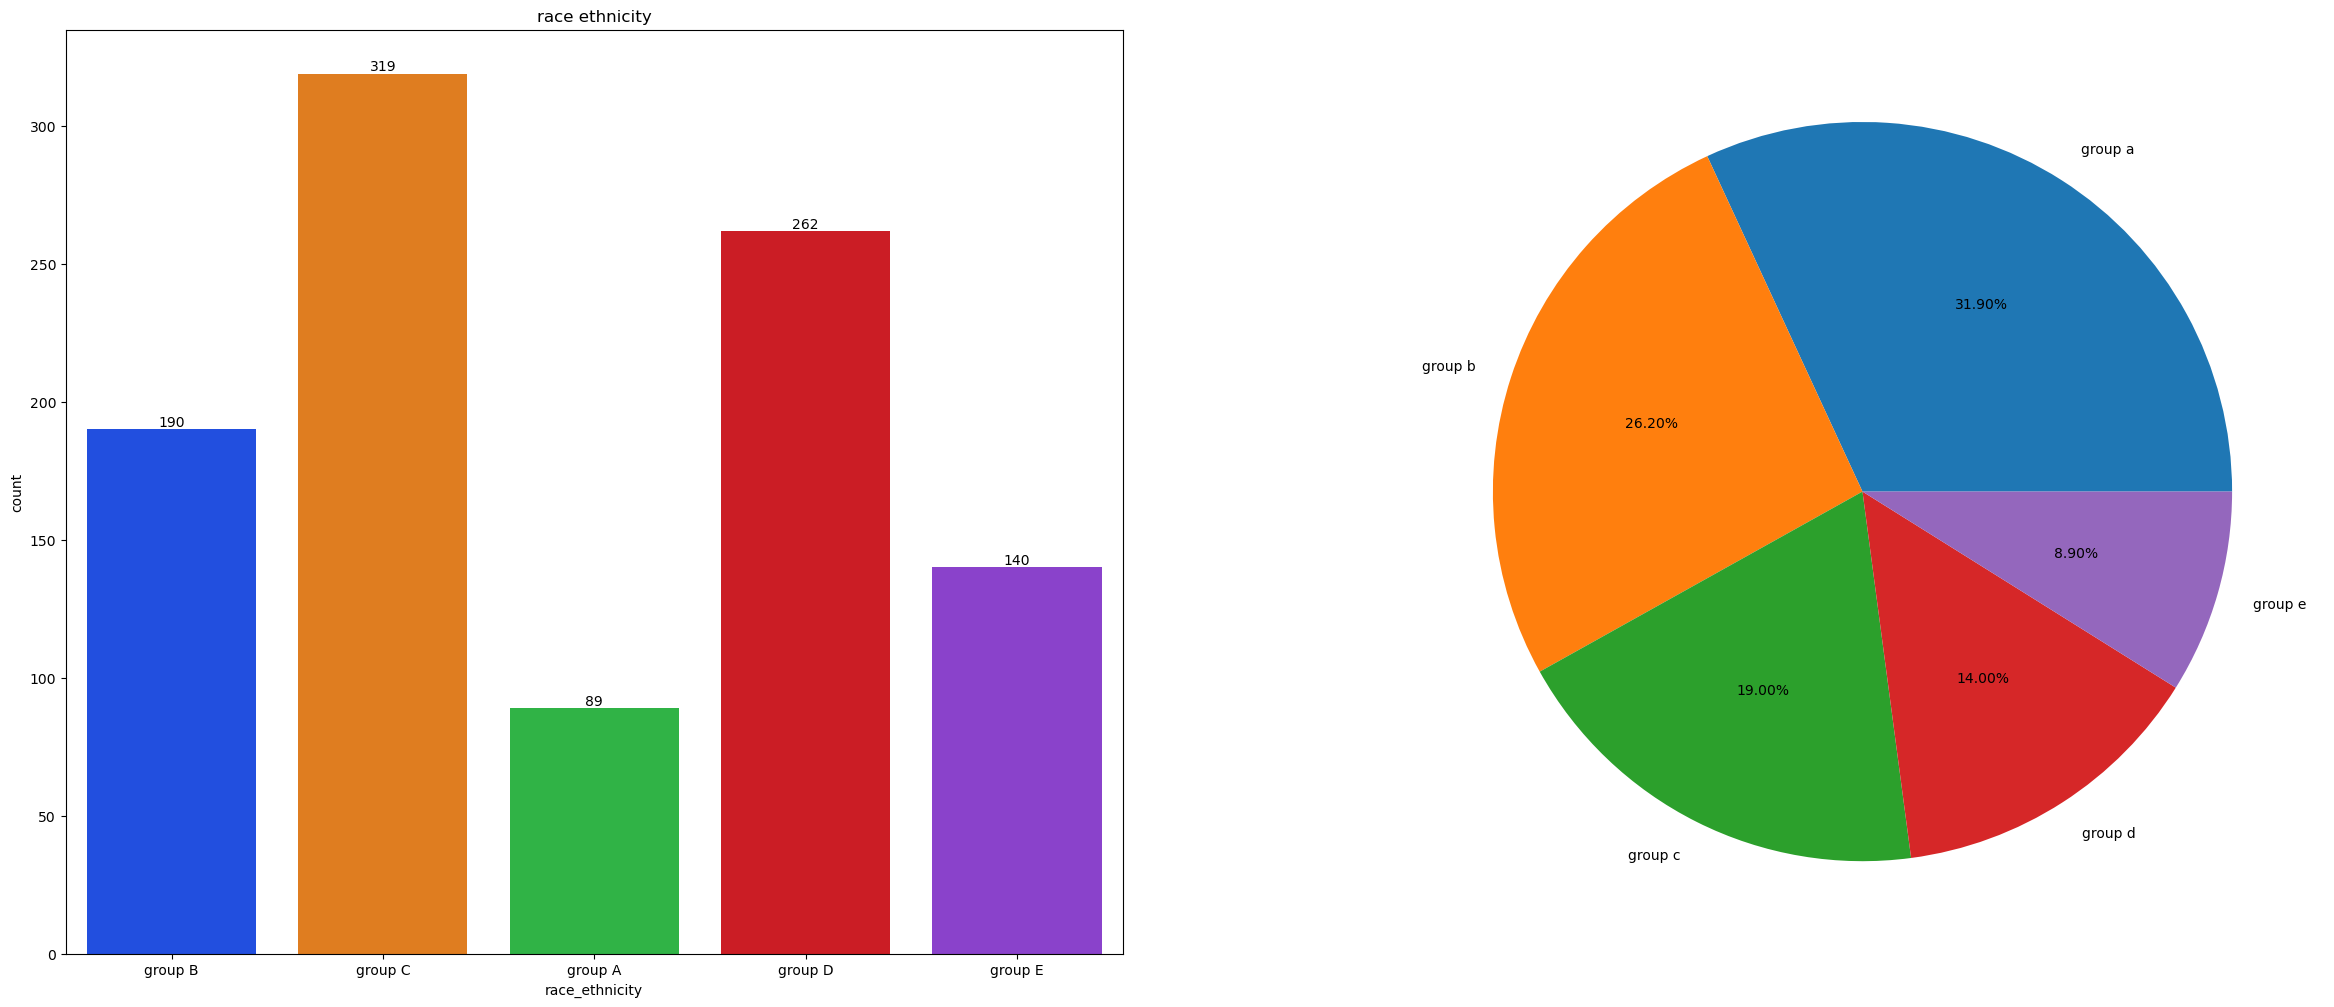

In [ ]:
    f, ax = plt.subplots(1,2) 

    sns.countplot(data=df,x=df["race_ethnicity"],palette="bright",ax=ax[0])
    for container in ax[0].containers:
        ax[0].bar_label(container, color="black")
    ax[0].set_title("race ethnicity")

    labels=["group a", "group b", "group c", "group d", "group e"]

    plt.pie(x=df["race_ethnicity"].value_counts(), labels=labels, autopct="%2.2f%%")

Text(0.5, 1.0, 'writing score')

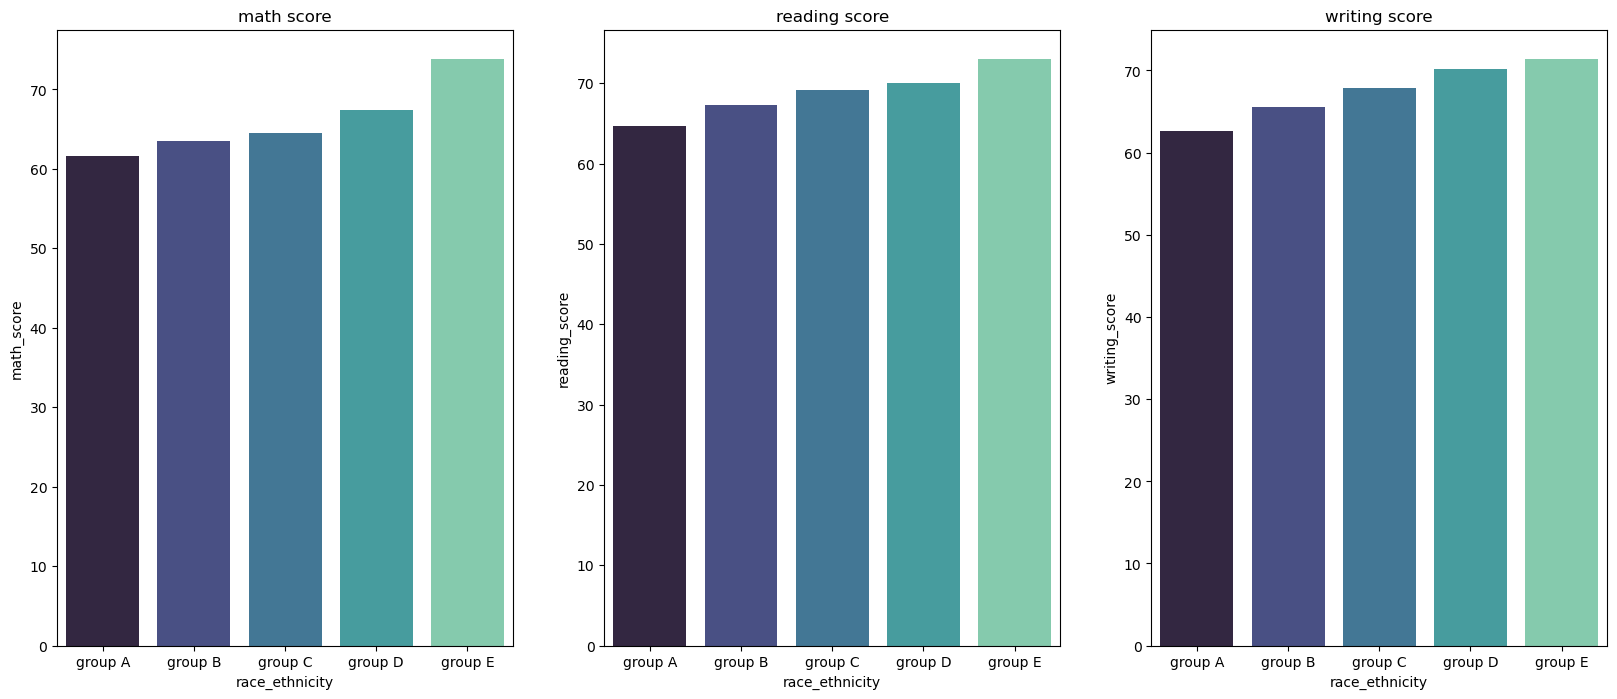

In [55]:
group_data3 = df.groupby("race_ethnicity")
f, ax = plt.subplots(1,3, figsize=(20,8))

sns.barplot(x=group_data3["math_score"].mean().index, y=group_data3["math_score"].mean(),palette="mako", ax=ax[0])
ax[0].set_title("math score")

sns.barplot(x=group_data3["reading_score"].mean().index, y=group_data3["reading_score"].mean(),  palette="mako", ax=ax[1])
ax[1].set_title("reading score")


sns.barplot(x=group_data3["writing_score"].mean().index, y=group_data3["writing_score"].mean(),  palette="mako", ax=ax[2])
ax[2].set_title("writing score")



## lunch univariate analysis

([<matplotlib.patches.Wedge at 0x2793fc56c50>,
 [Text(-0.48393302764960144, 0.9878303623344902, 'standard'),
  Text(0.48393293516224545, -0.9878304076435662, 'free/reduced')],
 [Text(-0.2639634696270553, 0.5388165612733582, '64.50%'),
  Text(0.2639634191794066, -0.5388165859873997, '35.50%')])

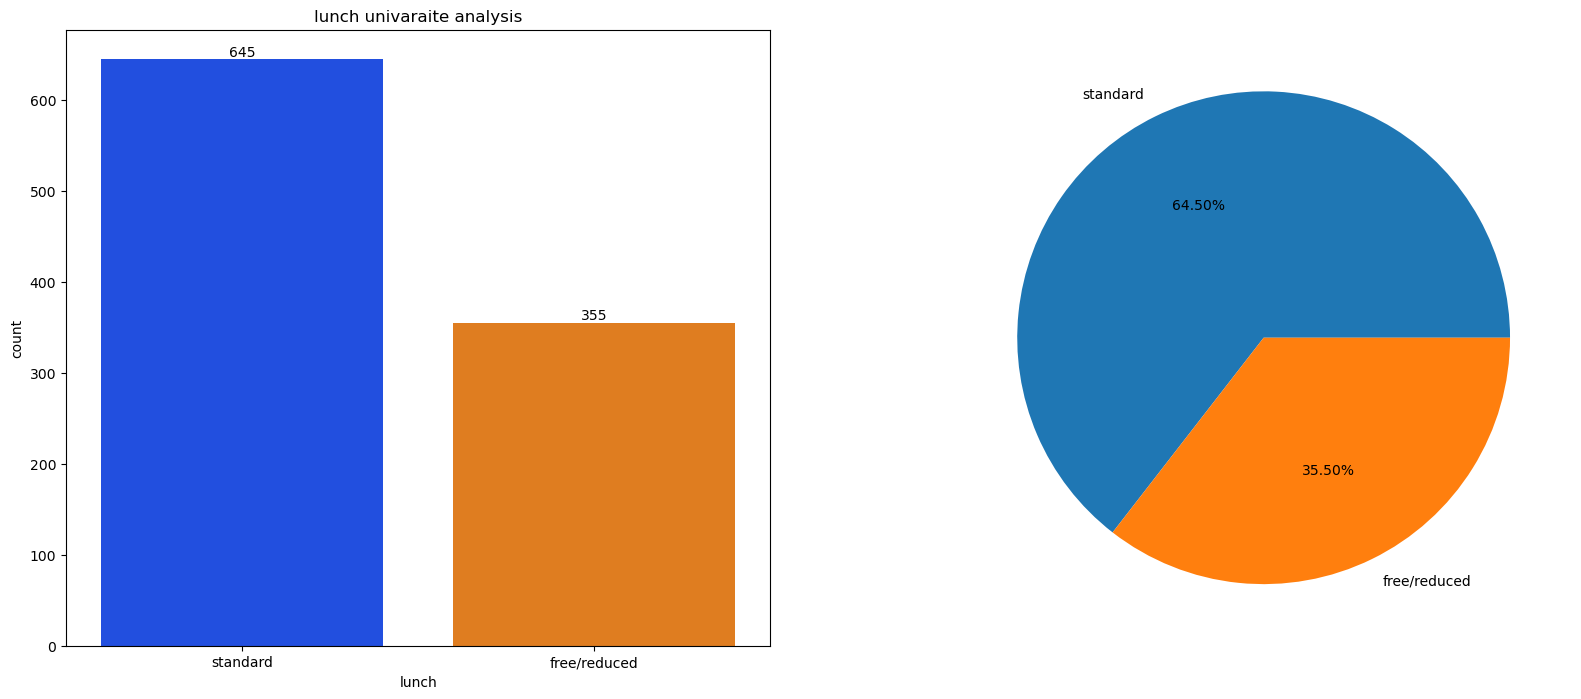

In [48]:
fig,ax = plt.subplots(1,2,figsize=(20,8))

sns.countplot( data=df,x=df["lunch"]  ,palette="bright", ax=ax[0])
ax[0].set_title("lunch univaraite analysis")
for container in ax[0].containers:
    ax[0].bar_label(container, color="black")



plt.pie(x=df["lunch"].value_counts(),data=df, labels=["standard","free/reduced"],autopct="%2.2f%%")
# df["lunch"]

Text(0.5, 1.0, 'writing score')

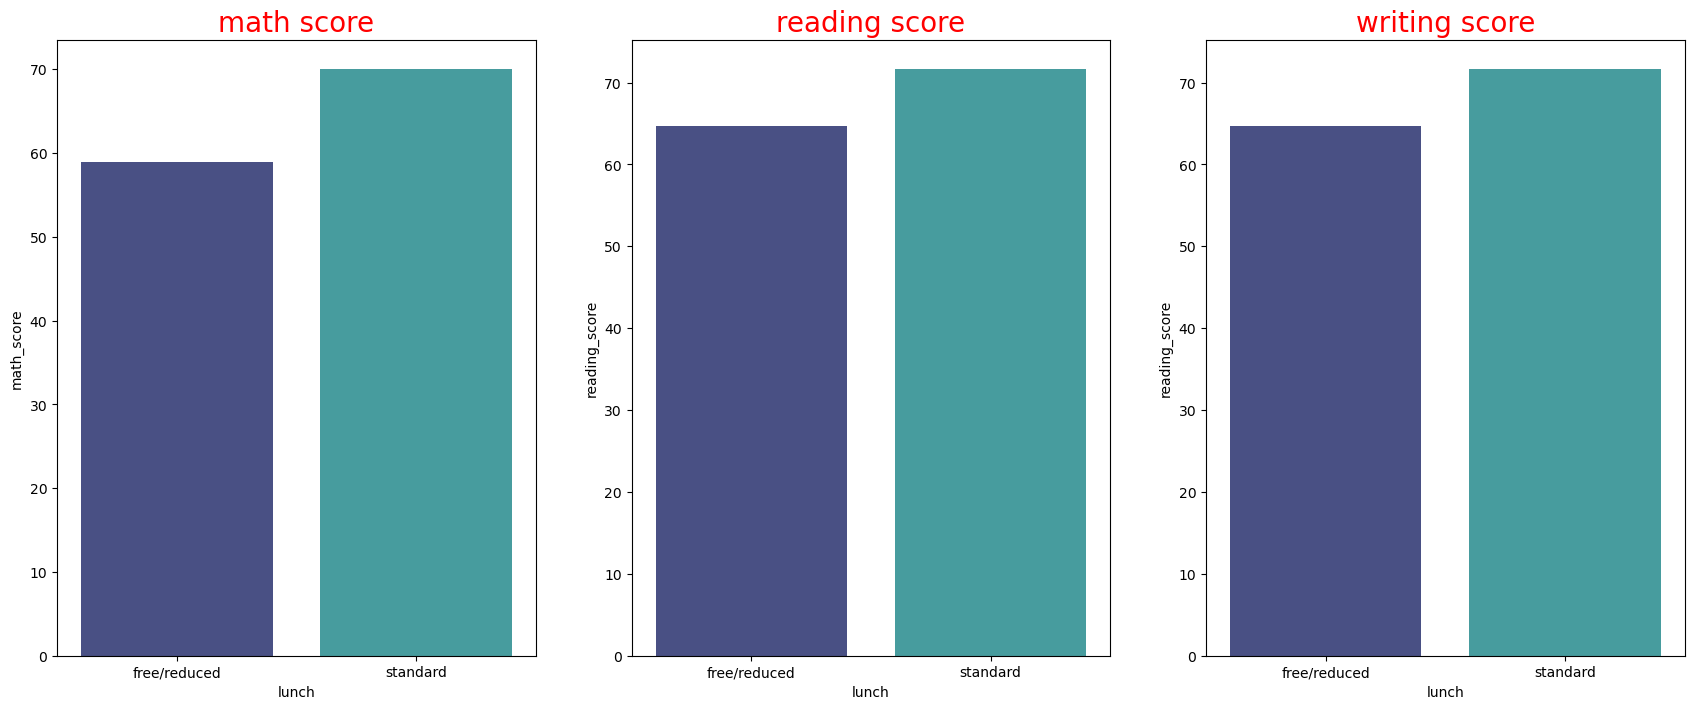

In [54]:
# lunch effect in marks
group_data=df.groupby("lunch")
f,ax = plt.subplots(1,3,figsize=(21,8))

sns.barplot(x=group_data["math_score"].mean().index, y=group_data["math_score"].mean(), palette="mako", ax=ax[0])
ax[0].set_title("math score", color="red", size=20)

sns.barplot(x=group_data["reading_score"].mean().index, y=group_data["reading_score"].mean(), palette="mako", ax=ax[1])
ax[1].set_title("reading score", color="red", size=20)

sns.barplot(x=group_data["reading_score"].mean().index, y=group_data["reading_score"].mean(), palette="mako", ax=ax[2])
ax[2].set_title("writing score", color="red", size=20)


## test preparation univariate / multivariate analysis

([<matplotlib.patches.Wedge at 0x2792cb6c510>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'tested'),
  Text(0.4746018041084478, -0.9923472817199666, 'not tested')],
 [Text(-0.2588736606535569, 0.5412803597211218, '64.20%'),
  Text(0.2588737113318806, -0.5412803354836181, '35.80%')])

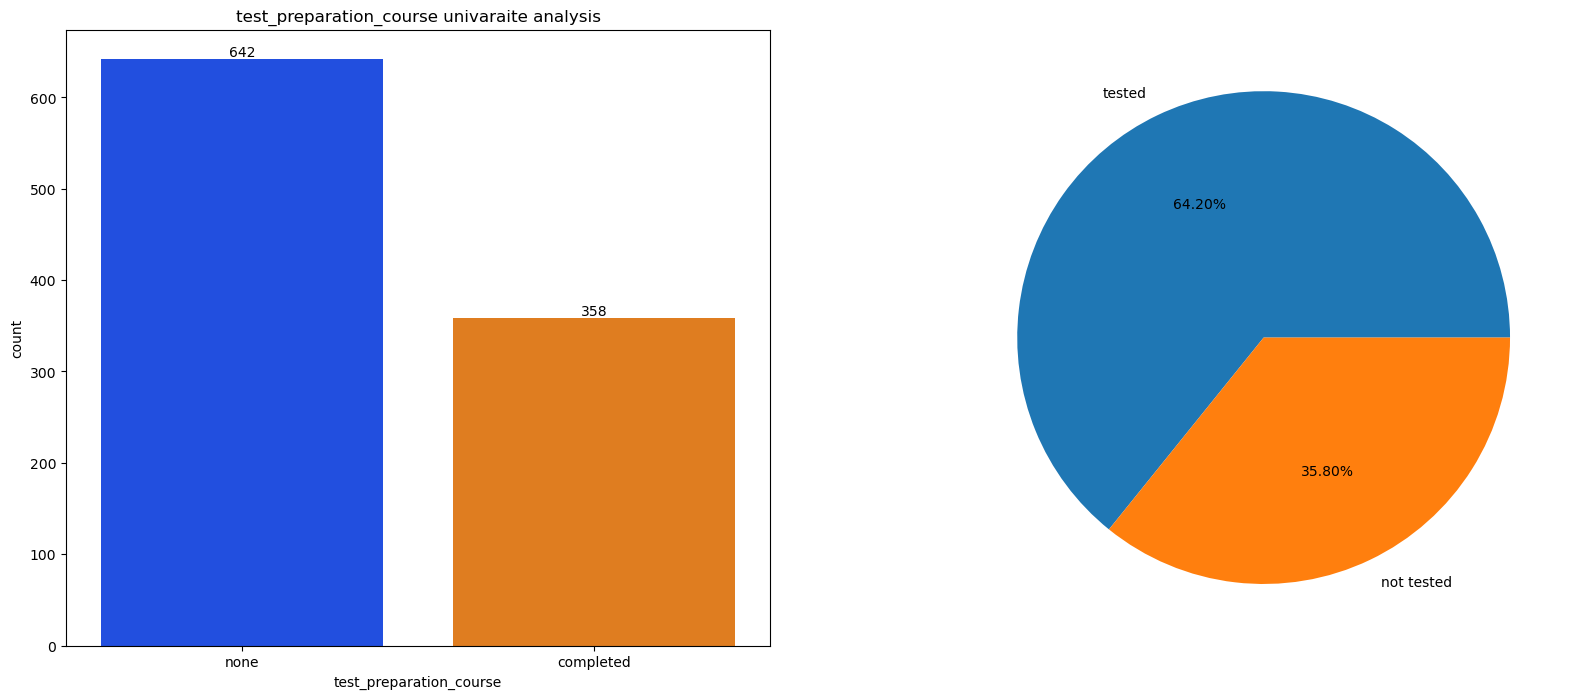

In [56]:
fig,ax = plt.subplots(1,2,figsize=(20,8))

sns.countplot( data=df,x=df["test_preparation_course"]  ,palette="bright", ax=ax[0])
ax[0].set_title("test_preparation_course univaraite analysis")
for container in ax[0].containers:
    ax[0].bar_label(container, color="black")



plt.pie(x=df["test_preparation_course"].value_counts(),data=df, labels=["tested","not tested"],autopct="%2.2f%%")
# df["lunch"]

c:\Users\Gobinath\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 3000x900 with 0 Axes>

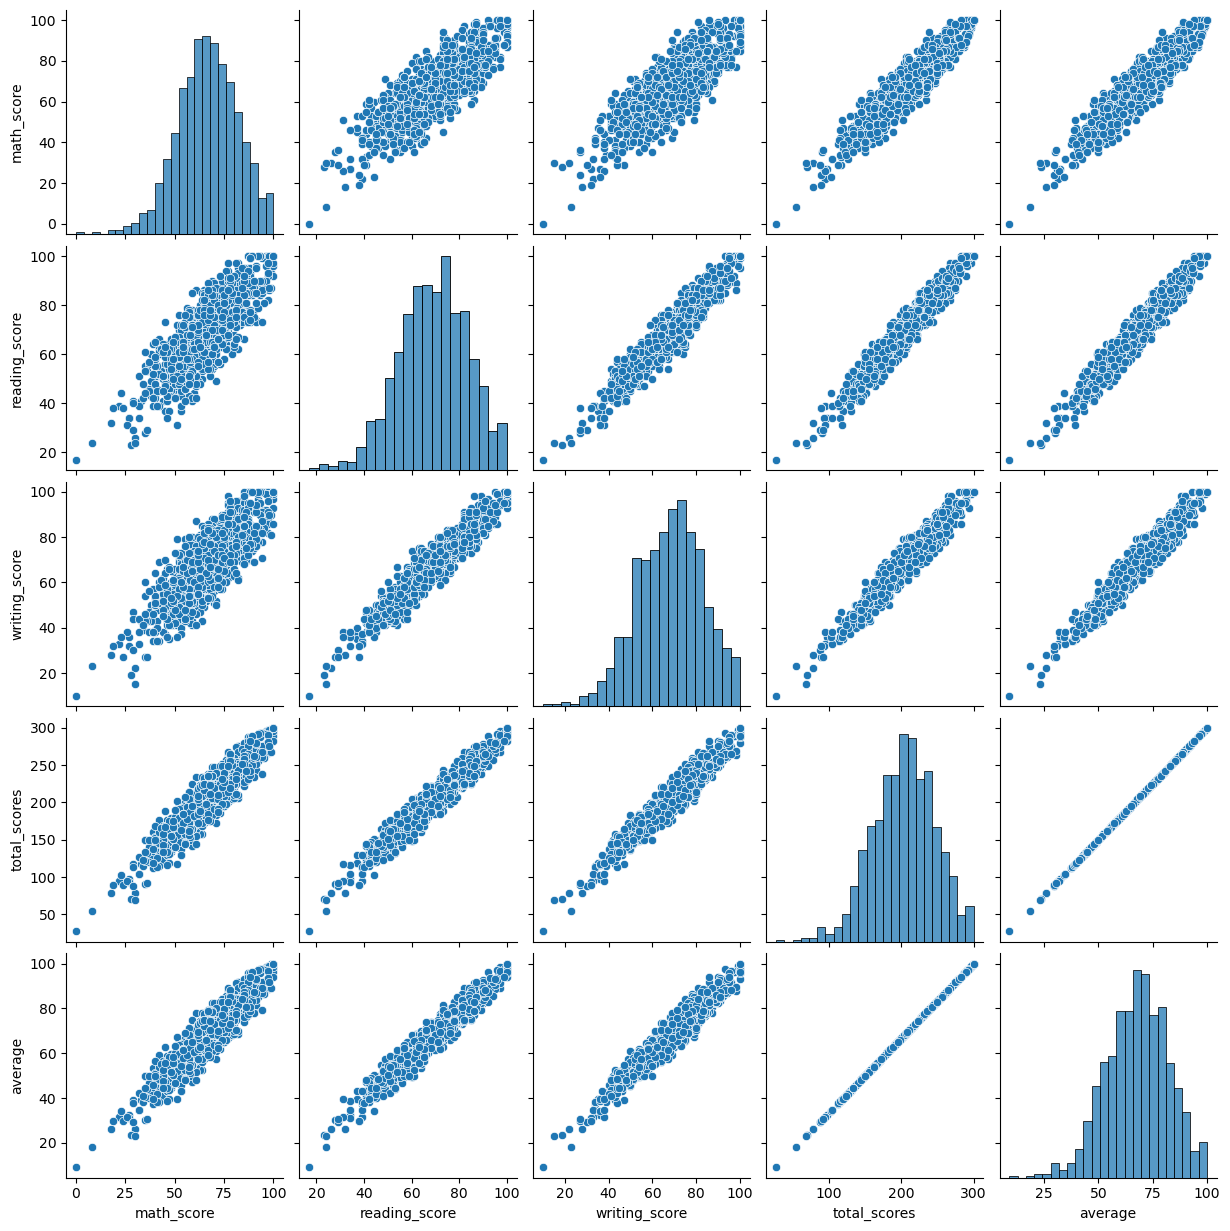

In [57]:
plt.figure(figsize=(30,9))

sns.pairplot(df)

plt.show()